In [89]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("="*60)
print("Mental Health and Illness in the world")
print("="*60)

# loading data
df=pd.read_csv(' mental-illnesses.csv')
# print(df.head())

# dropping null values
df.dropna()








Mental Health and Illness in the world


,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [14]:
# data summary
print('Data Summary:')
display(df.info())

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Code                                                                               6150 non-null   object 
 2   Year                                                                               6420 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6420 non-null   float64
 5   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non

None

In [15]:
# Descriptive statistics
print('Descriptive Statistics:')
display(df.describe(include='all'))

Descriptive Statistics:


,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,6420,6150,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
unique,214,205,NaN,NaN,NaN,NaN,NaN,NaN
top,Zimbabwe,ZWE,NaN,NaN,NaN,NaN,NaN,NaN
freq,30,30,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.500000,0.266604,3.767036,4.101840,0.636968,0.195664
std,NaN,NaN,8.656116,0.039383,0.925286,1.050543,0.233391,0.138380
min,NaN,NaN,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,NaN,NaN,1997.000000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,NaN,NaN,2004.500000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,NaN,NaN,2012.000000,0.286575,4.366252,4.564164,0.844406,0.251167


In [20]:
# checking missing values
missing_data=df.isnull().sum()
print('Missing values:')
display(missing_data[missing_data > 0])


Missing values:


Code    270
dtype: int64

Text(0.5, 1.0, 'Mean of depressive orders per country')

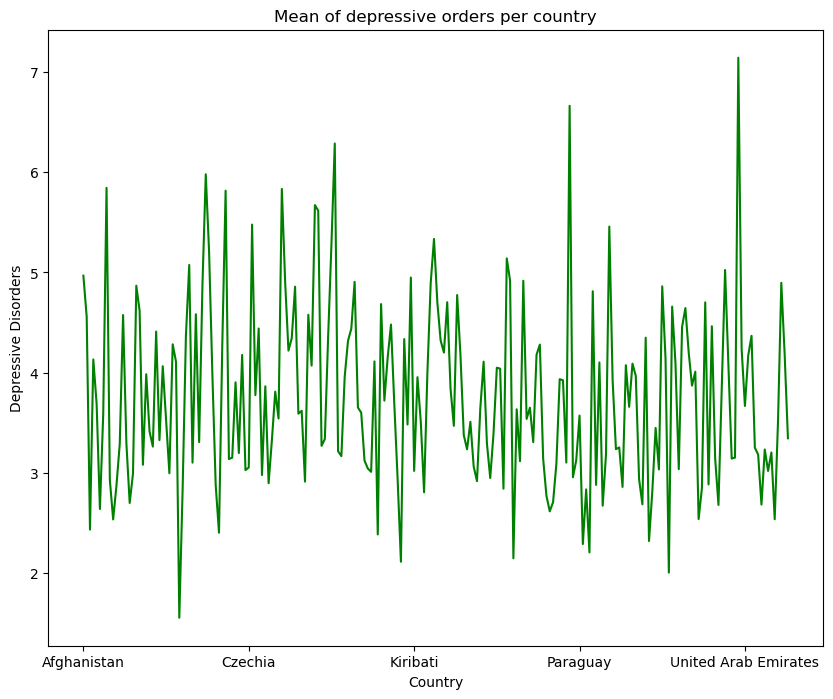

In [62]:
# Data visualization
plt.figure(figsize=(10,8))
bar_chart=df.groupby('Entity')['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].mean()
bar_chart.plot(color='green')
plt.xlabel('Country')
plt.ylabel('Depressive Disorders')
plt.title('Mean of depressive orders per country')



Text(0.5, 1.0, 'Depressive  disorders in Years')

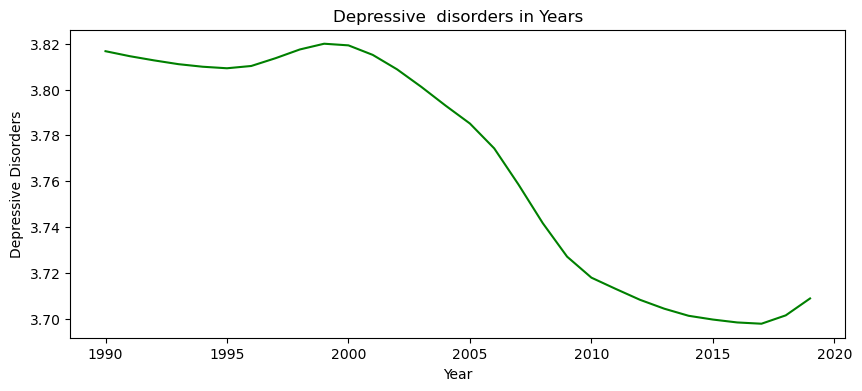

In [72]:
# Lifestyle factors - Ubuntu: "Collective Habits"
# Data visualization
plt.figure(figsize=(10,4))
bar_chart=df.groupby('Year')['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].mean()
bar_chart.plot(color='green')
plt.xlabel('Year')
plt.ylabel('Depressive Disorders')
plt.title('Depressive  disorders in Years')

Text(0.5, 1.0, 'Bipolar  disorders in Years')

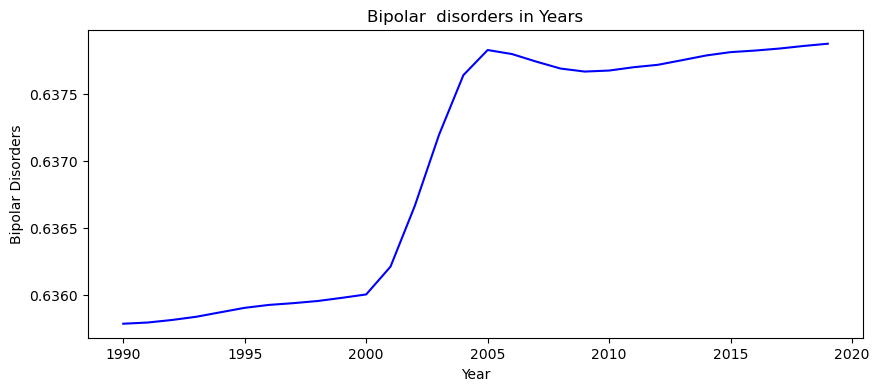

In [73]:
# Lifestyle factors - Ubuntu: "Collective Habits"
# Data visualization
plt.figure(figsize=(10,4))
bar_chart=df.groupby('Year')['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'].mean()
bar_chart.plot(color='blue')
plt.xlabel('Year')
plt.ylabel('Bipolar Disorders')
plt.title('Bipolar  disorders in Years')

Text(0.5, 1.0, 'Eating  disorders in Years')

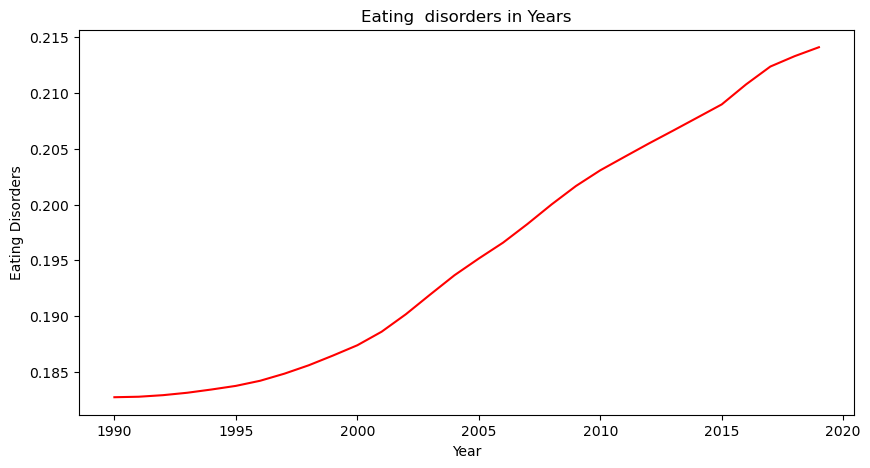

In [74]:
# Lifestyle factors - Ubuntu: "Collective Habits"
# Data visualization
plt.figure(figsize=(10,5))
bar_chart=df.groupby('Year')['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'].mean()
bar_chart.plot(color='red')
plt.xlabel('Year')
plt.ylabel('Eating Disorders')
plt.title('Eating  disorders in Years')

Text(0.5, 1.0, 'Schizophrenia  Disorders in Years')

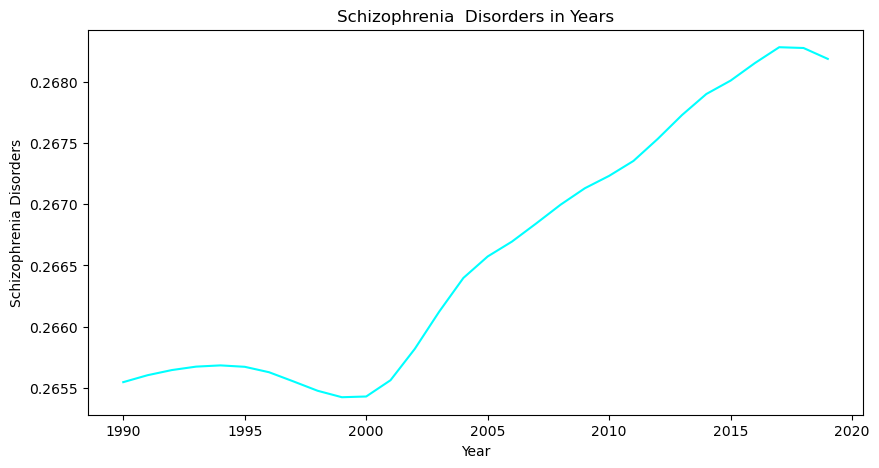

In [75]:
# Lifestyle factors - Ubuntu: "Collective Habits"
# Data visualization
plt.figure(figsize=(10,5))
bar_chart=df.groupby('Year')['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'].mean()
bar_chart.plot(color='cyan')
plt.xlabel('Year')
plt.ylabel('Schizophrenia Disorders')
plt.title('Schizophrenia  Disorders in Years')


In [80]:
# Encode categorical variables - Ubuntu: "Translating Diverse Voices"
encoder = LabelEncoder()
categorical_cols = ['Year','Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
                    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized','Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
                    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',	
                    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print("\n🔤 Encoded Data Head:")
display(df.head())


🔤 Encoded Data Head:


,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,0,AFG,0,1359,5834,4984,3837,2740
1,0,AFG,1,1345,5822,4977,3836,2623
2,0,AFG,2,1324,5806,4961,3827,2481
3,0,AFG,3,1308,5801,4946,3821,2352
4,0,AFG,4,1278,5802,4938,3818,2272


In [82]:
# Example: Assume 'target' column is the label
X = df.drop('Entity', axis=1)
y = df['Entity']

# Encode categorical target if necessary
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

In [97]:
X = pd.get_dummies(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'USA'

In [96]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


ValueError: could not convert string to float: 'ARM'